In [43]:
import pandas as pd
import seaborn as sns

In [44]:
df=pd.read_excel('data.xlsx')

In [45]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [46]:
columns_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


In [47]:
df = df.rename(columns = columns_names)

In [48]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [49]:
df.columns = df.columns.str.lower()

In [50]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [51]:
#select a sample of the dataset
simple_linear_reg_df = df[['relative_compactness', 'cooling_load']].sample(15, random_state = 2)

In [52]:
simple_linear_reg_df

,relative_compactness,cooling_load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


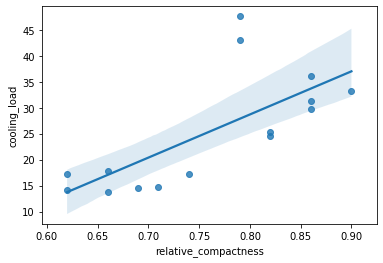

In [53]:
sns.regplot(x = "relative_compactness", y = "cooling_load", data = simple_linear_reg_df)

## Mean Absolute Error

In [54]:
#Firstly normalise dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalised_df.drop(columns = ['heating_load', 'cooling_load'])
heating_target = normalised_df['heating_load']

In [56]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [58]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

## R squared

In [59]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

## Residual Sum of Squares

In [60]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.817

##  Root Mean Square Error

In [61]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

## comparing the effects of regularisation

In [62]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [63]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,relative_compactness,-0.606412,-0.283471,-0.027719
1,roof_area,-0.328099,-0.163192,-0.000000
2,surface_area,-0.235022,-0.062275,0.000000
3,orientation,0.003399,0.003369,0.000000
4,wall_area,0.018947,0.103061,0.200087
5,glazing_area_distribution,0.028452,0.029088,0.021431
6,glazing_area,0.215042,0.212449,0.206132
7,overall_height,0.393549,0.442467,0.463482


In [66]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,relative_compactness,-0.606412,-0.283471,-0.027719
1,roof_area,-0.328099,-0.163192,-0.000000
2,surface_area,-0.235022,-0.062275,0.000000
3,orientation,0.003399,0.003369,0.000000
4,wall_area,0.018947,0.103061,0.200087
5,glazing_area_distribution,0.028452,0.029088,0.021431
6,glazing_area,0.215042,0.212449,0.206132
7,overall_height,0.393549,0.442467,0.463482
